In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys, os
import pandas as pd
import seaborn as sns
from scipy.io import arff
import data_processing as dp
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)

warnings.filterwarnings("ignore")

data = arff.loadarff("../data/3year.arff")
df = pd.DataFrame(data[0])
df_origin = df.copy()

In [2]:
def logistic_regression_model(*args):
    X_train = args[0]
    X_test = args[1]
    y_train = args[2]
    y_test = args[3]

    # Reset indices to ensure alignment
    X_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)

    logistic_model = LogisticRegression()

    logistic_model.fit(X_train, y_train)

    train_predictions = logistic_model.predict(X_train)
    test_predictions = logistic_model.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    precision_score_ = precision_score(y_test, test_predictions)
    recall_score_ = recall_score(y_test, test_predictions)
    f1_score_ = f1_score(y_test, test_predictions)

    print(classification_report(y_test, test_predictions))
    print(confusion_matrix(y_test, test_predictions))
    print("test predictions: ", test_predictions, len(test_predictions))
    print(f"\nprecision_score: {precision_score_}")
    print(f"recall_score: {recall_score_}")
    print(f"train_accuracy: {train_accuracy}")
    print(f"test_accuracy: {test_accuracy}")
    print(f"f1score: {f1_score_}")

    return train_accuracy, test_accuracy

In [3]:
train_test_dataset = dp.pre_process(df)  # with SMOTE
print(f"X_train.shape: {train_test_dataset[0].shape}")
logistic_regression_model(*train_test_dataset)

X_train.shape: (13978, 30)
              precision    recall  f1-score   support

           0       0.96      0.56      0.71      3017
           1       0.05      0.52      0.09       134

    accuracy                           0.56      3151
   macro avg       0.51      0.54      0.40      3151
weighted avg       0.92      0.56      0.69      3151

[[1702 1315]
 [  64   70]]
test predictions:  [1 0 0 ... 1 0 0] 3151

precision_score: 0.05054151624548736
recall_score: 0.5223880597014925
train_accuracy: 0.5420661038775219
test_accuracy: 0.5623611551888289
f1score: 0.09216589861751152


(0.5420661038775219, 0.5623611551888289)

              precision    recall  f1-score   support

           0       0.96      0.54      0.69      3017
           1       0.04      0.46      0.08       134

    accuracy                           0.54      3151
   macro avg       0.50      0.50      0.39      3151
weighted avg       0.92      0.54      0.67      3151

[[1638 1379]
 [  72   62]]
test predictions:  [0 0 0 ... 1 0 0] 3151

precision_score: 0.04302567661346287
recall_score: 0.4626865671641791
train_accuracy: 0.5237516096723422
test_accuracy: 0.5395112662646778
f1score: 0.07873015873015873
              precision    recall  f1-score   support

           0       0.96      0.55      0.70      3017
           1       0.05      0.50      0.09       134

    accuracy                           0.54      3151
   macro avg       0.50      0.52      0.39      3151
weighted avg       0.92      0.54      0.67      3151

[[1647 1370]
 [  67   67]]
test predictions:  [1 0 0 ... 1 0 0] 3151

precision_score: 0.04662491301322199
r

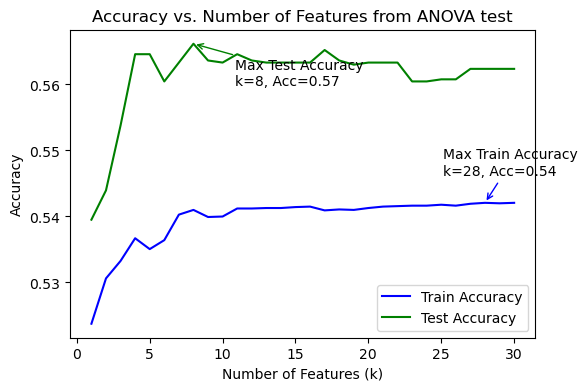

model metrics after ANOVA
              precision    recall  f1-score   support

           0       0.96      0.57      0.71      3017
           1       0.05      0.52      0.09       134

    accuracy                           0.57      3151
   macro avg       0.51      0.55      0.40      3151
weighted avg       0.93      0.57      0.69      3151

[[1714 1303]
 [  64   70]]
test predictions:  [1 0 0 ... 1 0 0] 3151

precision_score: 0.05098324836125273
recall_score: 0.5223880597014925
train_accuracy: 0.5409929889826871
test_accuracy: 0.5661694700095208
f1score: 0.09289980092899801


(0.5409929889826871, 0.5661694700095208)

In [4]:
best_train_test_dataset = dp.find_best_k_features_from_ANOVA(
    logistic_regression_model, *train_test_dataset
)

print("model metrics after ANOVA")
logistic_regression_model(*best_train_test_dataset)